In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
import pandas as pd
from wrangle import wrangle_telco
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler

np.random.seed(123)

In [2]:
df = wrangle_telco()

In [3]:
df.head()

,monthly_charges,tenure,total_charges
customer_id,,,
0013-SMEOE,109.70,71,7904.25
0014-BMAQU,84.65,63,5377.80
0016-QLJIS,90.45,65,5957.90
0017-DINOC,45.20,54,2460.55
0017-IUDMW,116.80,72,8456.75


In [12]:
train_validate, x_test = train_test_split(df, test_size=.2, 
                                        random_state=123)
x_train, x_validate = train_test_split(train_validate, test_size=.3, 
                                   random_state=123)

In [13]:
x_train.shape, x_validate.shape, x_test.shape

((943, 3), (405, 3), (337, 3))

In [14]:
x_train

,monthly_charges,tenure,total_charges
customer_id,,,
2208-NKVVH,24.25,43,1077.95
6993-YGFJV,112.55,69,7806.50
6614-FHDBO,109.20,72,7878.30
3512-IZIKN,65.30,70,4759.75
8414-OOEEL,79.50,66,5196.10
...,...,...,...
9110-HSGTV,82.45,69,5555.30
2197-OMWGI,53.00,68,3656.25
5458-CQJTA,74.80,65,4820.15


1. Apply the scalers we talked about in this lesson to your data and visualize the results for the unscaled and scaled distribution .

<ipython-input-15-5f4ab2aec28b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train['minmax_monthly_charges'] = scaler.transform(x_train[['monthly_charges']])


Text(0.5, 1.0, 'Scaled')

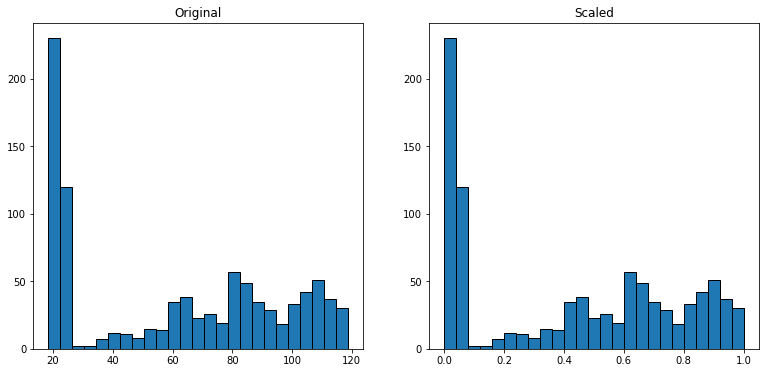

In [15]:
scaler = sklearn.preprocessing.MinMaxScaler()
# Note that we only call .fit with the training data,
# but we use .transform to apply the scaling to all the data splits.
scaler.fit(x_train[['monthly_charges']])
x_train['minmax_monthly_charges'] = scaler.transform(x_train[['monthly_charges']])

x_train_scaled = scaler.transform(x_train[['monthly_charges']])
x_validate_scaled = scaler.transform(x_validate)
x_test_scaled = scaler.transform(x_test)

plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(x_train[['monthly_charges']], bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(x_train_scaled, bins=25, ec='black')
plt.title('Scaled')

In [16]:
x_train

,monthly_charges,tenure,total_charges,minmax_monthly_charges
customer_id,,,,
2208-NKVVH,24.25,43,1077.95,0.058296
6993-YGFJV,112.55,69,7806.50,0.938216
6614-FHDBO,109.20,72,7878.30,0.904833
3512-IZIKN,65.30,70,4759.75,0.467364
8414-OOEEL,79.50,66,5196.10,0.608869
...,...,...,...,...
9110-HSGTV,82.45,69,5555.30,0.638266
2197-OMWGI,53.00,68,3656.25,0.344793
5458-CQJTA,74.80,65,4820.15,0.562033


<ipython-input-20-df1e1ba95e5f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train['robust_monthly_charges'] = scaler.transform(x_train[['monthly_charges']])


Text(0.5, 1.0, 'Scaled')

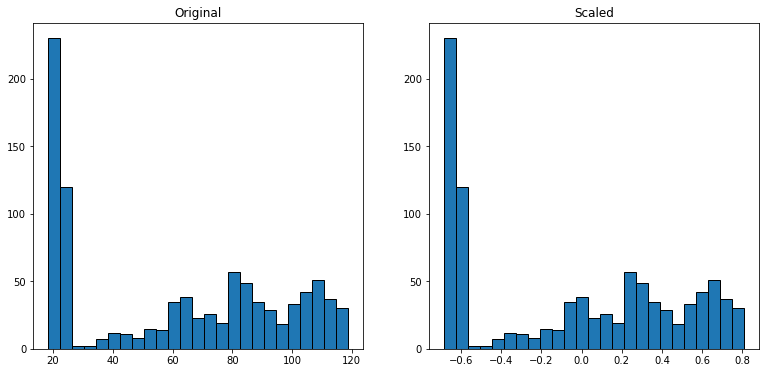

In [20]:
scaler = sklearn.preprocessing.RobustScaler()
# Note that we only call .fit with the training data,
# but we use .transform to apply the scaling to all the data splits.
scaler.fit(x_train[['monthly_charges']])
x_train['robust_monthly_charges'] = scaler.transform(x_train[['monthly_charges']])

x_train_scaled = scaler.transform(x_train[['monthly_charges']])
x_validate_scaled = scaler.transform(x_validate)
x_test_scaled = scaler.transform(x_test)

plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(x_train[['monthly_charges']], bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(x_train_scaled, bins=25, ec='black')
plt.title('Scaled')

In [21]:
x_train

,monthly_charges,tenure,total_charges,minmax_monthly_charges,robust_monthly_charges
customer_id,,,,,
2208-NKVVH,24.25,43,1077.95,-1.057807,-0.597547
6993-YGFJV,112.55,69,7806.50,1.475576,0.714976
6614-FHDBO,109.20,72,7878.30,1.379463,0.665180
3512-IZIKN,65.30,70,4759.75,0.119944,0.012635
8414-OOEEL,79.50,66,5196.10,0.527351,0.223709
...,...,...,...,...,...
9110-HSGTV,82.45,69,5555.30,0.611988,0.267559
2197-OMWGI,53.00,68,3656.25,-0.232951,-0.170197
5458-CQJTA,74.80,65,4820.15,0.392505,0.153846


<ipython-input-25-71b3dfee5ff7>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train['standard_monthly_charges'] = scaler.transform(x_train[['monthly_charges']])


Text(0.5, 1.0, 'Scaled')

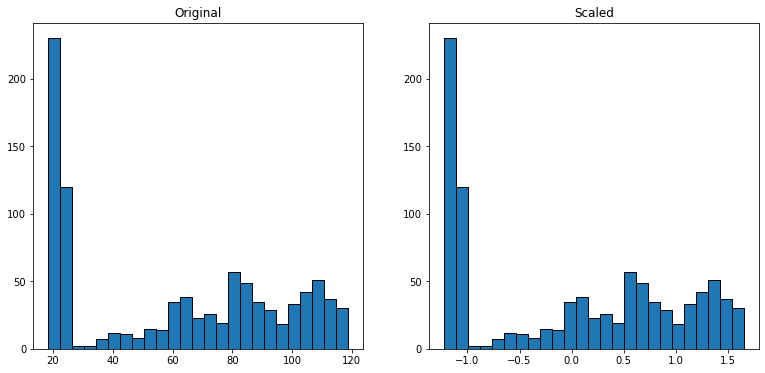

In [25]:
scaler = sklearn.preprocessing.StandardScaler()
# Note that we only call .fit with the training data,
# but we use .transform to apply the scaling to all the data splits.
scaler.fit(x_train[['monthly_charges']])
x_train['standard_monthly_charges'] = scaler.transform(x_train[['monthly_charges']])

x_train_scaled = scaler.transform(x_train[['monthly_charges']])
#x_validate_scaled = scaler.transform(x_validate)
#x_test_scaled = scaler.transform(x_test)

plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(x_train[['monthly_charges']], bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(x_train_scaled, bins=25, ec='black')
plt.title('Scaled')

In [26]:
x_train

,monthly_charges,tenure,total_charges,minmax_monthly_charges,robust_monthly_charges,standard_monthly_charges
customer_id,,,,,,
2208-NKVVH,24.25,43,1077.95,-1.057807,-0.597547,-1.057807
6993-YGFJV,112.55,69,7806.50,1.475576,0.714976,1.475576
6614-FHDBO,109.20,72,7878.30,1.379463,0.665180,1.379463
3512-IZIKN,65.30,70,4759.75,0.119944,0.012635,0.119944
8414-OOEEL,79.50,66,5196.10,0.527351,0.223709,0.527351
...,...,...,...,...,...,...
9110-HSGTV,82.45,69,5555.30,0.611988,0.267559,0.611988
2197-OMWGI,53.00,68,3656.25,-0.232951,-0.170197,-0.232951
5458-CQJTA,74.80,65,4820.15,0.392505,0.153846,0.392505


2. Apply the .inverse_transform method to your scaled data. Is the resulting dataset the exact same as the original data?

Text(0.5, 1.0, 'Inverse Scaled')

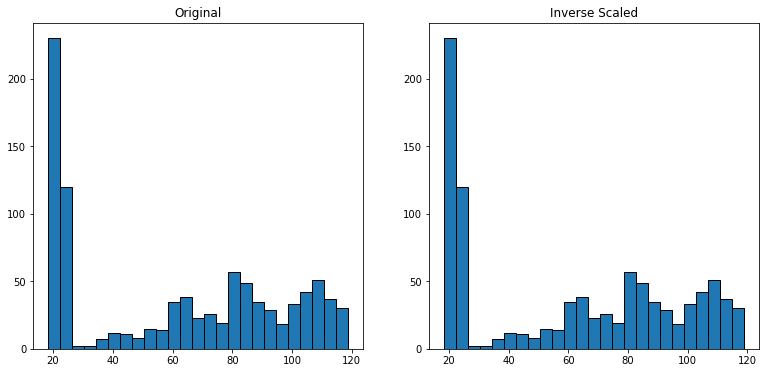

In [33]:
scaler = sklearn.preprocessing.StandardScaler()
# Note that we only call .fit with the training data,
# but we use .transform to apply the scaling to all the data splits.
scaler.fit(x_train[['monthly_charges']])

x_train_scaled_inverse = scaler.inverse_transform(x_train[['standard_monthly_charges']])
#x_validate_scaled = scaler.transform(x_validate)
#x_test_scaled = scaler.transform(x_test)

plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(x_train[['monthly_charges']], bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(x_train_scaled_inverse, bins=25, ec='black')
plt.title('Inverse Scaled')

3. Read the documentation for sklearn's QuantileTransformer. Use normal for the output_distribution and apply this scaler to your data. Visualize the result of your data scaling.


In [44]:
# 1. Create the object
scaler2 = sklearn.preprocessing.QuantileTransformer(output_distribution = 'normal')

# 2. Fit to the train data
scaler2.fit(x_train[['monthly_charges']])

# 3. Use the object
x_train2 = scaler2.transform(x_train[['monthly_charges']])
x_test2 = scaler2.transform(x_test[['monthly_charges']])
x_validate2 = scaler2.transform(x_validate[['monthly_charges']])

scaled = pd.DataFrame(x_train2)
scaled.columns = ['monthly_charges']

/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (943). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


Text(0.5, 1.0, 'Quantile Scaled Monthly Charges')

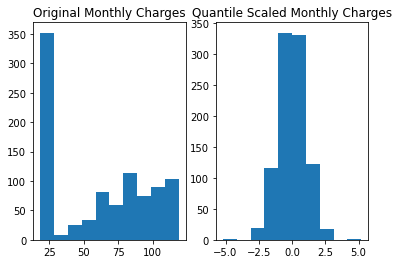

In [45]:
plt.subplot(121)
plt.hist(x_train.monthly_charges)
plt.title('Original Monthly Charges')

plt.subplot(122)
plt.hist(scaled.monthly_charges)
plt.title('Quantile Scaled Monthly Charges')


4. Use the QuantileTransformer, but omit the output_distribution argument. Visualize your results. What do you notice?

The scaled data is not a normal distribution.

In [47]:
# 1. Create the object
scaler3 = sklearn.preprocessing.QuantileTransformer()

# 2. Fit to the train data
scaler3.fit(x_train[['monthly_charges']])

# 3. Use the object
x_train3 = scaler3.transform(x_train[['monthly_charges']])
x_test3 = scaler3.transform(x_test[['monthly_charges']])
x_validate3 = scaler3.transform(x_validate[['monthly_charges']])

scaled = pd.DataFrame(x_train3)
scaled.columns = ['monthly_charges']


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (943). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


Text(0.5, 1.0, 'Quantile Scaled Monthly Charges')

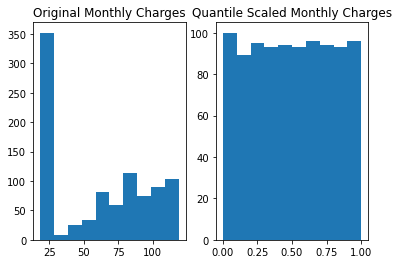

In [48]:
plt.subplot(121)
plt.hist(x_train.monthly_charges)
plt.title('Original Monthly Charges')

plt.subplot(122)
plt.hist(scaled.monthly_charges)
plt.title('Quantile Scaled Monthly Charges')

5. Based on the work you've done, choose a scaling method for your dataset. Write a function within your prepare.py that accepts as input the train, validate, and test data splits, and returns the scaled versions of each. Be sure to only learn the parameters for scaling from your training data!
